# **Análise Exploratória - Projeto Rebaixamento Brasileiro Série A Masculino**



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Leitura do arquivo
url = "https://raw.githubusercontent.com/RudahNascimento/Rebaixamento-Brasileirao-Serie-A-Masculino/main/data/dados_gerais.csv"
dados_gerais = pd.read_csv(url)

dados_gerais.head(20)

,Time,Temporada,V,D,E,GF,GT,Subiu,Situação,Permanecimento
0,Guarani,2003,7,8,4,31,30,0,F,5
1,Athletico-PR,2003,6,9,4,26,28,0,F,5
2,Flamengo,2003,6,7,6,25,31,0,F,5
3,Goias,2003,2,10,7,27,34,0,F,3
4,Internacional,2003,8,6,5,26,26,0,F,5
5,Criciuma,2003,9,7,3,23,23,1,F,0
6,Juventude,2003,3,10,6,18,36,0,F,5
7,Fortaleza,2003,5,10,4,20,27,1,R,0
8,Cruzeiro,2003,12,3,4,40,21,0,F,5
9,Vitoria,2003,7,7,5,24,30,0,F,5


In [5]:
# Verificação da porcentagem de de times que caem em X anos após subirem da segunda divisão

dados_gerais['Rebaixado Predic'] = 0

dados_gerais.loc[(dados_gerais['Subiu'] == 1) & (dados_gerais['Situação'] == 'R'), 'Rebaixado Predic'] = 1

dados_gerais.loc[(dados_gerais['Rebaixado Predic'] == 0) & (dados_gerais['Subiu'] == 1) &
                 (dados_gerais.groupby('Time')['Situação'].shift(-1) == 'R'), 'Rebaixado Predic'] = 2

dados_gerais.loc[(dados_gerais['Rebaixado Predic'] == 0) & (dados_gerais['Subiu'] == 1) &
                 (dados_gerais.groupby('Time')['Situação'].shift(-2) == 'R'), 'Rebaixado Predic'] = 3

dados_gerais.loc[(dados_gerais['Rebaixado Predic'] == 0) & (dados_gerais['Subiu'] == 1) &
                 (dados_gerais.groupby('Time')['Situação'].shift(-3) == 'R'), 'Rebaixado Predic'] = 4

dados_gerais.loc[(dados_gerais['Rebaixado Predic'] == 0) & (dados_gerais['Subiu'] == 1) &
                 (dados_gerais.groupby('Time')['Situação'].shift(-4) == 'R'), 'Rebaixado Predic'] = 5


condicao = dados_gerais['Rebaixado Predic'].isin([1, 2, 3, 4, 5])

n_linhas = condicao.sum()

total = (dados_gerais['Subiu'] == 1).sum()

porcentagem = n_linhas / total * 100

print(f"{porcentagem:.2f}% dos times que subiram, caíram nas próximas 5 temporadas")

75.31% dos times que subiram, caíram nas próximas 5 temporadas


Após verificar que 75.31% dos times que sobem, caem em até 5 anos, foi feito a adição do feature de anos de permanecimento na Série A.

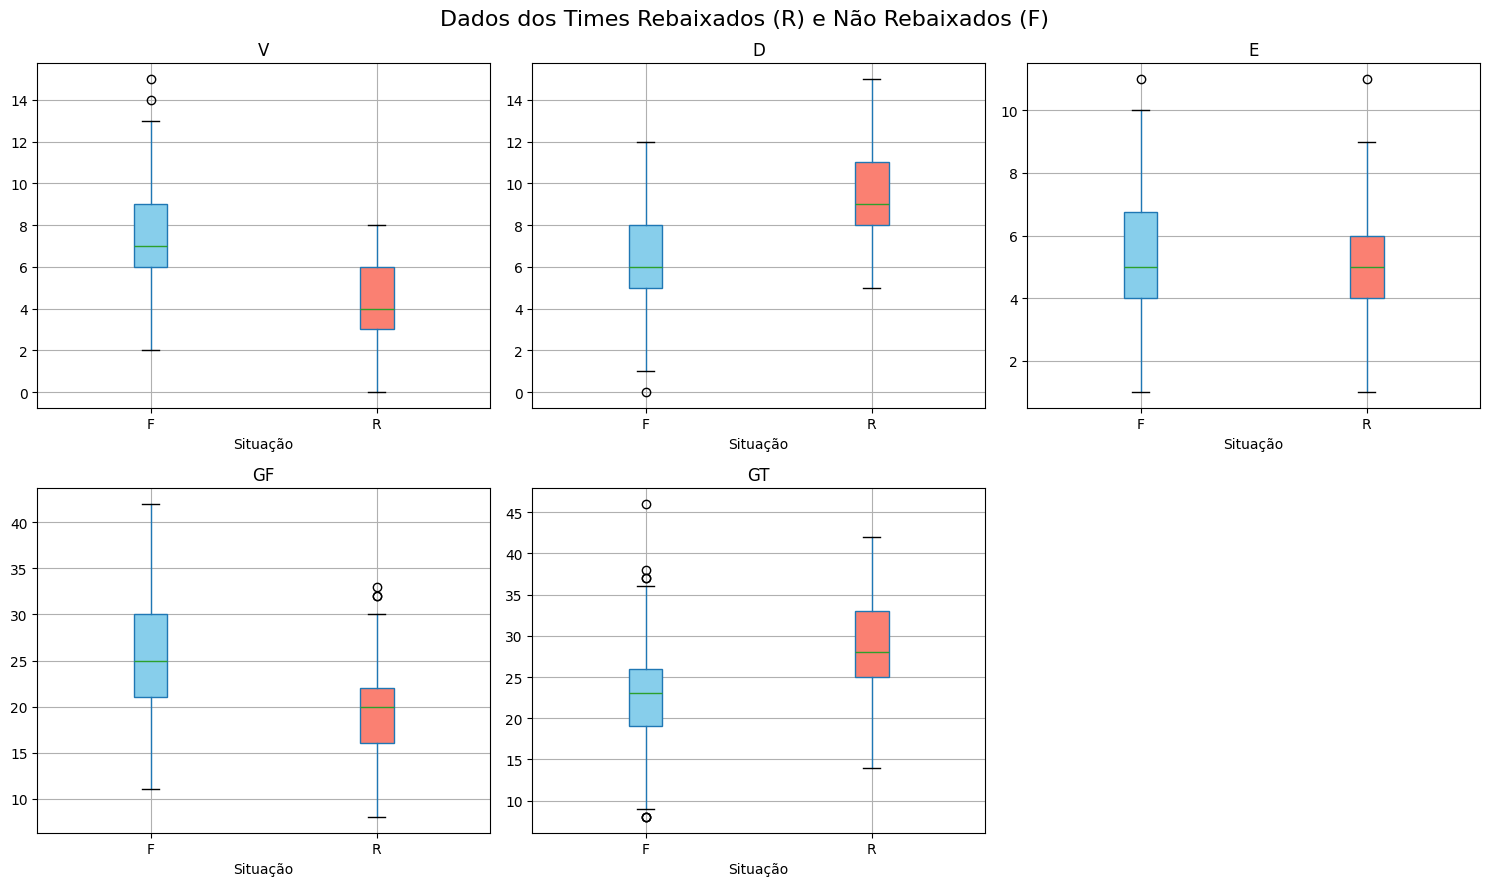

In [6]:
# Boxplots

variaveis = ['V', 'D', 'E', 'GF', 'GT']

fig, axis = plt.subplots(2, 3, figsize=(15, 9))
axis = axis.flatten()

for x, y in zip(variaveis, axis):
    graf = dados_gerais.boxplot(column=x, by='Situação', ax=y, patch_artist=True)
    boxes = y.patches[:2]
    for z, k in zip(boxes, ['skyblue', 'salmon']):
        z.set_facecolor(k)
    y.set_title(x)
    y.set_xlabel('Situação')

fig.delaxes(axis[-1])
plt.suptitle('Dados dos Times Rebaixados (R) e Não Rebaixados (F)', fontsize=16)
plt.tight_layout()
plt.show()

A partir dos boxplots, foram identificados alguns outliers que, pela natureza da previsão a ser realizada e por representarem situações extremamente raras, foram retirados do dataset.

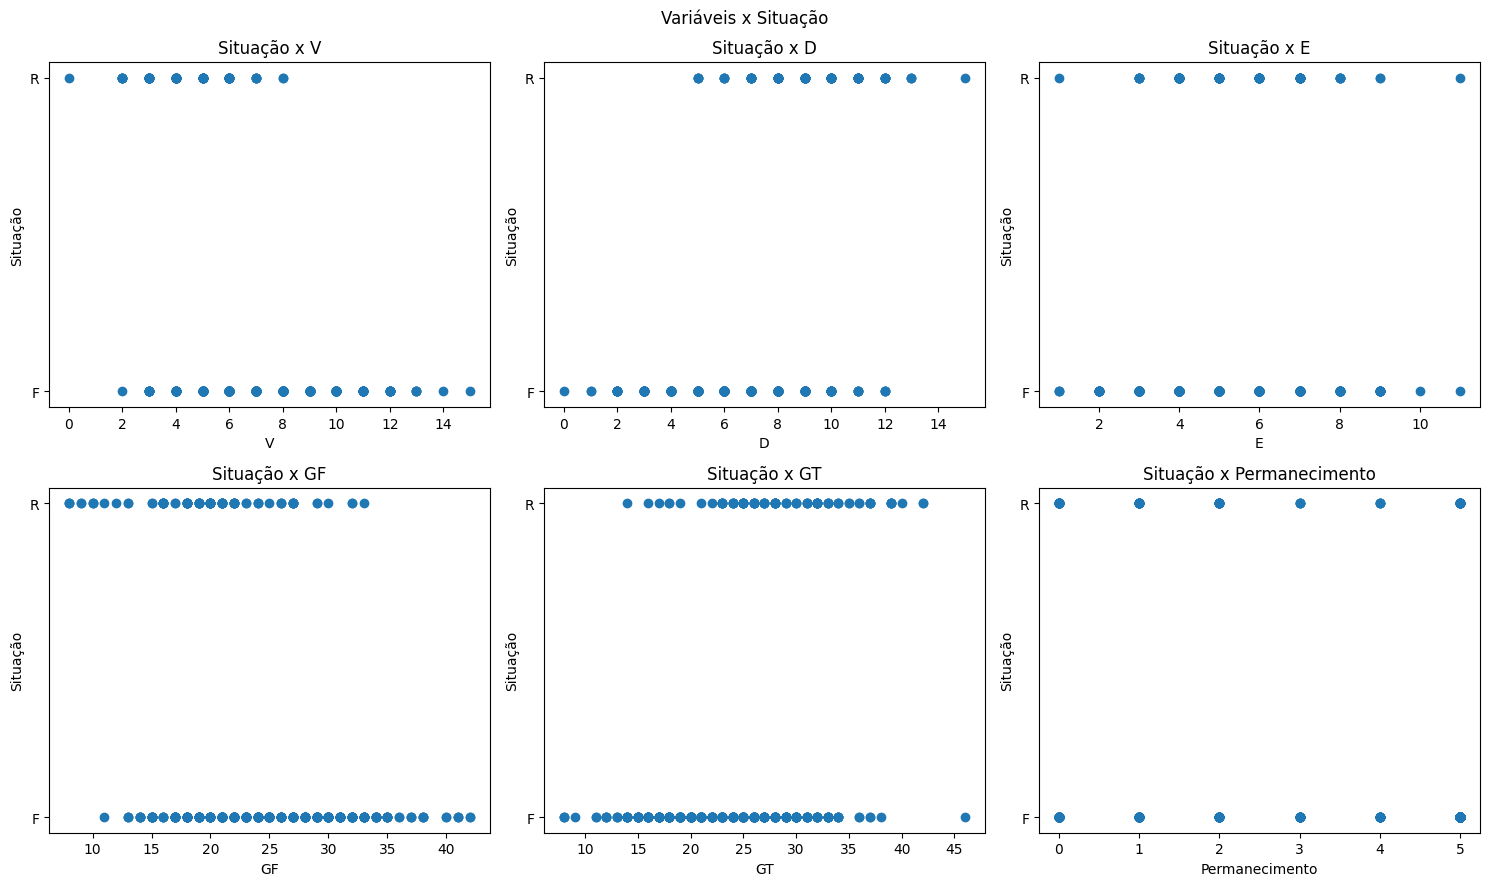

In [7]:
# Gráficos de dispersão

variaveis_2 = ['V', 'D', 'E', 'GF', 'GT', 'Permanecimento']

fig_2, axis_2 = plt.subplots(2, 3, figsize=(15, 9))
axis_2 = axis_2.flatten()

for variavel, axi in zip(variaveis_2, axis_2):
    axi.scatter(dados_gerais[variavel], dados_gerais['Situação'])
    axi.set_xlabel(variavel)
    axi.set_ylabel("Situação")
    axi.set_title(f"Situação x {variavel}")

plt.suptitle("Variáveis x Situação")
plt.tight_layout()
plt.show()

Foram plotados os gráficos de dispersão para, principalmente para futuramente ser utilizado o modelo de regressão logística, se verificar a o encaixe do comportamento dos dados na curva sinuosa.